In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('higgs-boson/training.csv')

# replace -999.0 (missng values) with NaN
nan_list = {}
for col in data.columns:
    if -999.0 in data[col].value_counts().keys():
        nan = {str(col): data[col].value_counts()[-999.0]}
        nan_list.update(nan)
nan_df = pd.DataFrame(list(nan_list.items()), columns=['Columns', 'Num -999 Values'])
data[nan_df["Columns"]] = data[nan_df["Columns"]].replace({-999.0:np.nan})

# correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

data = data.drop(to_drop, axis=1)

In [3]:
data = data.dropna()

In [4]:
data.shape

(68114, 30)

In [5]:
X = data.drop("Label", axis=1)
y = data["Label"]
print(X.shape, y.shape)

(68114, 29) (68114,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [7]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
classifier.fit(X_train, y_train)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
# Training Score
classifier.score(X_train, y_train)
# Testing Score
classifier.score(X_test, y_test)

0.6989840859709907

In [10]:
# Decision Tree Classifier
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

1.0

In [12]:
feature_names = data.columns
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.7285169690952376, 'Weight'),
 (0.09559345876944779, 'DER_mass_MMC'),
 (0.02655991785974661, 'DER_deltaeta_jet_jet'),
 (0.021554968664478983, 'DER_prodeta_jet_jet'),
 (0.019415357962702665, 'DER_lep_eta_centrality'),
 (0.014648832528145549, 'DER_mass_jet_jet'),
 (0.013598742112947131, 'DER_met_phi_centrality'),
 (0.012789995244143131, 'DER_mass_transverse_met_lep'),
 (0.009209767170394045, 'DER_deltar_tau_lep'),
 (0.008989540359319629, 'DER_pt_tot'),
 (0.008025420778917084, 'PRI_tau_pt'),
 (0.005061609949071115, 'DER_pt_ratio_lep_tau'),
 (0.004565841989204268, 'DER_pt_h'),
 (0.004191624671394096, 'PRI_jet_num'),
 (0.0029203183297126147, 'PRI_met'),
 (0.0025940977575678262, 'DER_sum_pt'),
 (0.00213190573735399, 'PRI_lep_pt'),
 (0.0019686948813990722, 'PRI_jet_subleading_pt'),
 (0.0019497193222667761, 'PRI_lep_eta'),
 (0.0019264700391001196, 'PRI_tau_eta'),
 (0.0019130130984969557, 'PRI_jet_leading_eta'),
 (0.0018898518811417484, 'PRI_jet_subleading_eta'),
 (0.0018462238766905493, 'PR

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit_transform(X_train,y_train)

array([[ 2.39202495],
       [-2.89739935],
       [-1.5308148 ],
       ...,
       [-1.7008005 ],
       [ 0.80478528],
       [-1.84600959]])

In [14]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

k: 1, Train/Test Score: 1.000/0.603
k: 3, Train/Test Score: 0.809/0.623
k: 5, Train/Test Score: 0.761/0.626
k: 7, Train/Test Score: 0.737/0.628
k: 9, Train/Test Score: 0.721/0.633
k: 11, Train/Test Score: 0.712/0.634
k: 13, Train/Test Score: 0.704/0.636
k: 15, Train/Test Score: 0.697/0.636
k: 17, Train/Test Score: 0.693/0.638
k: 19, Train/Test Score: 0.688/0.639
k: 21, Train/Test Score: 0.685/0.642
k: 23, Train/Test Score: 0.682/0.642
k: 25, Train/Test Score: 0.679/0.640
k: 27, Train/Test Score: 0.676/0.640
k: 29, Train/Test Score: 0.674/0.639


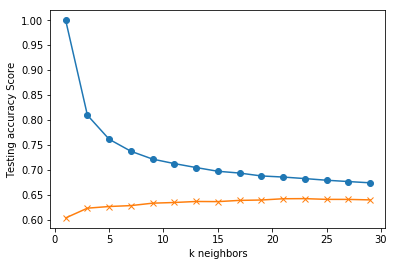

In [15]:
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [16]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train, y_train)
print('k=21 Test Acc: %.3f' % knn.score(X_test, y_test))

k=21 Test Acc: 0.642


In [17]:
# Support Vector Machine Linear Classifier
from sklearn.svm import SVC 
from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler().fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

In [18]:
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [19]:
model.score(X_test_scaled, y_test)

0.9433906864760115

In [20]:
from sklearn.metrics import classification_report

target_names = ["s", "b"]
predictions = model.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

           s       0.99      0.90      0.94      9055
           b       0.90      0.99      0.94      7974

    accuracy                           0.94     17029
   macro avg       0.94      0.95      0.94     17029
weighted avg       0.95      0.94      0.94     17029



In [21]:
# Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [12]:
grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.9213694286217629, total=  27.9s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   36.2s remaining:    0.0s


[CV] ...... C=1, gamma=0.0001, score=0.9267089499647639, total=  28.5s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s


[CV] ........ C=1, gamma=0.0001, score=0.92394879022786, total=  28.6s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.9213694286217629, total=  27.6s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.9267089499647639, total=  28.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ......... C=1, gamma=0.001, score=0.92394879022786, total=  28.3s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.9213694286217629, total=  27.6s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.9267089499647639, total=  28.1s
[CV] C=1, gamma=0.01 .................................................
[CV] .......... C=1, gamma=0.01, score=0.92394879022786, total=  28.2s
[CV] C=5, gamma=0.0001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 15.9min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [13]:
print(grid.best_params_)

{'C': 10, 'gamma': 0.0001}


In [14]:
print(grid.best_score_)

0.9978663012626016


In [15]:
predictions = grid.predict(X_test_scaled)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["S", "B"]))

             precision    recall  f1-score   support

          S       1.00      1.00      1.00      9055
          B       1.00      1.00      1.00      7974

avg / total       1.00      1.00      1.00     17029



In [22]:
# SGDClassifier
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(random_state=1)
sgd_classifier.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=1, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [23]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_classifier, X_train, y_train, cv=3, scoring="accuracy")

array([0.6700922 , 0.54803852, 0.59572469])

In [24]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_class = GradientBoostingClassifier(n_estimators=50, max_depth=5,min_samples_leaf=200,max_features=10,verbose=1)
grad_boost_class.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.2345            4.35s
         2           1.1326            4.15s
         3           0.9871            4.90s
         4           0.8652            4.83s
         5           0.7619            4.61s
         6           0.6786            4.50s
         7           0.6016            4.35s
         8           0.5347            4.19s
         9           0.4762            4.10s
        10           0.4279            3.94s
        20           0.1549            2.87s
        30           0.0579            1.91s
        40           0.0225            0.96s
        50           0.0089            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=10, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=200, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=1,
                           warm_start=False)

In [25]:
from sklearn.model_selection import cross_val_score

# kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(grad_boost_class, X_test, y_test, cv=3)
# print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


      Iter       Train Loss   Remaining Time 
         1           1.2099            0.75s
         2           1.0514            0.79s
         3           0.9709            0.82s
         4           0.8973            0.79s
         5           0.8111            0.77s
         6           0.7155            0.75s
         7           0.6334            0.73s
         8           0.5757            0.71s
         9           0.5157            0.69s
        10           0.4737            0.67s
        20           0.1641            0.51s
        30           0.0654            0.33s
        40           0.0287            0.16s
        50           0.0111            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1957            0.34s
         2           1.0397            0.62s
         3           0.9199            0.66s
         4           0.8086            0.64s
         5           0.7660            0.64s
         6           0.6770            0.65s
        

In [7]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
import tensorflow
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [9]:
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
deep_model = Sequential()
deep_model.add(Dense(units=100, activation='relu', input_dim=29))
deep_model.add(Dense(units=100, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
deep_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
deep_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3000      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 13,302
Trainable params: 13,302
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=10,
    shuffle=True,
    verbose=2
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
 - 5s - loss: 0.2718 - acc: 0.8805
Epoch 2/10
 - 5s - loss: 0.0633 - acc: 0.9833
Epoch 3/10
 - 5s - loss: 0.0087 - acc: 0.9991
Epoch 4/10
 - 5s - loss: 0.0017 - acc: 0.9999
Epoch 5/10
 - 5s - loss: 0.0105 - acc: 0.9977
Epoch 6/10
 - 5s - loss: 3.6957e-04 - acc: 1.0000
Epoch 7/10
 - 5s - loss: 2.4730e-04 - acc: 1.0000
Epoch 8/10
 - 5s - loss: 1.6677e-04 - acc: 1.0000
Epoch 9/10
 - 5s - loss: 0.0128 - acc: 0.9976
Epoch 10/10
 - 5s - loss: 1.4275e-04 - acc: 1.0000


In [15]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

 - 1s - loss: 3.4226e-04 - acc: 1.0000
Deep Neural Network - Loss: 0.00034225697132580726, Accuracy: 1.0


In [16]:
history.history.keys()

dict_keys(['loss', 'acc'])

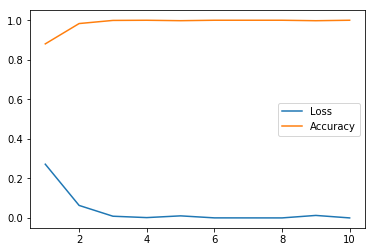

In [18]:
plt.figure()
plt.plot(range(1, 11), history.history['loss'])
plt.plot(range(1, 11), history.history['acc'])
plt.legend(['Loss', 'Accuracy'])

In [20]:
history.history['acc']

[1.0, 1.0, 1.0, 1.0, 0.9934423, 1.0, 1.0, 1.0, 1.0, 0.99951065]